In [1]:
import matplotlib.pyplot
import seaborn
import pandas
import numpy
import qnorm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from scipy.stats import zscore

In [2]:
#Open the manifest with the name of the files we gonna use to build our DataFrame.

In [3]:
#Open the file with the names of the samples.
mf_name = '/home/marti/jupy/jup_notebook/Project/Data/gdc_manifest.2023-09-19.txt'
data = pandas.read_csv(mf_name, delimiter='\t')

In [4]:
data = data.iloc[:15]
data

,id,filename,md5,size,state
0,6feef177-114c-4285-b242-481fe0aea551,77322072-2a7f-49e6-a9d1-c521c25acd70.rna_seq.a...,45b7be11c5973bc8825c17ba14a80053,4257905,released
1,b9ac77d6-9a1b-443d-8ef5-e8ef2e3008dd,6f6bf240-1ca4-47d0-9a77-17b0ce9b8ae7.rna_seq.a...,11bcef36ba61bd2bf27d9c24b968c510,4264851,released
2,3563bce2-6547-4081-883e-1e7e498c83be,59e8b7b7-5183-4655-aa5e-e4b5ba73eded.rna_seq.a...,f31fdad9c9382c6c9983bfb59b11fb5e,4217198,released
3,68b00cb6-4335-4c64-a3e0-0c29ed574480,5418228b-cfd0-4580-87c6-3ebf6282ad73.rna_seq.a...,fbabeebae2266a15dd0d21fc71796c93,4211769,released
4,55831884-c907-457d-bb2c-7c7b3f7c4cd1,c7fd0bf8-753e-45d6-b987-51ec7559f728.rna_seq.a...,e198516b3361c40dec102e1e65bacffb,4237695,released
5,4089d037-ab25-47a6-be68-19742473cbc6,50c308c9-922a-4083-ae09-e5e4d8c437af.rna_seq.a...,168c5577e8da0154d7e4a2d823f394c2,4242766,released
6,db0caa6a-e863-4dad-a911-0c69127be9df,55071ef3-bf09-43a2-a54c-a9ec61a84615.rna_seq.a...,1205cb7b4e1f0da5eb3547caf95c3e83,4255626,released
7,a0fce6cc-a525-4970-82b7-8512bb0708b3,7d9c7c34-76e0-4622-b5f7-60e12f6d4e07.rna_seq.a...,15cec03c65ac24e7da940cd4b9f99219,4252453,released
8,38ec487d-0a4a-4287-9c14-4bfdb959b402,32675d71-6f79-4b8f-ab7c-e2350b15875c.rna_seq.a...,27afb72bae1bc85f4df940514d7490d2,4235385,released
9,1ab1279d-7ccd-4450-8de8-9987bf6627dd,3d11905a-16eb-40b2-a36b-e37dca6359d3.rna_seq.a...,4a31afd3c6898a422bb240417fa53e34,4225469,released


In [5]:
# With the names of the files we generate a DataFrame concatenating the files of the diferents patiens.

In [6]:
#Creation of the DataFrame of the samples. (Aquesta part tarda  +10min, a la hora de fer la demo hauries de evitar fer aquest pas.)
df = pandas.DataFrame()
count=0
for _, row in data.iterrows():
    count+=1
    file_id_1 = str(row[1])
    file_id = '/home/marti/jupy/jup_notebook/Project/Data/' + file_id_1
    data_sample = pandas.read_csv(file_id, delimiter='\t', skiprows=1)
    patient = (file_id_1)
    if count>1:
        df2 = pandas.DataFrame()
        df2[patient] = data_sample['tpm_unstranded']
        df=pandas.concat([df,df2],axis=1) 
    else:
        df2 = pandas.DataFrame()
        df['gene_id']= data_sample['gene_id']
        df2[patient] = data_sample['tpm_unstranded']
        df=pandas.concat([df,df2],axis=1) 
print('Tot okay')  

Tot okay


In [7]:
#We set the column 'gene_id' as the index, this column contain the id of the genes.
df.set_index('gene_id', inplace=True)
df

,77322072-2a7f-49e6-a9d1-c521c25acd70.rna_seq.augmented_star_gene_counts.tsv,6f6bf240-1ca4-47d0-9a77-17b0ce9b8ae7.rna_seq.augmented_star_gene_counts.tsv,59e8b7b7-5183-4655-aa5e-e4b5ba73eded.rna_seq.augmented_star_gene_counts.tsv,5418228b-cfd0-4580-87c6-3ebf6282ad73.rna_seq.augmented_star_gene_counts.tsv,c7fd0bf8-753e-45d6-b987-51ec7559f728.rna_seq.augmented_star_gene_counts.tsv,50c308c9-922a-4083-ae09-e5e4d8c437af.rna_seq.augmented_star_gene_counts.tsv,55071ef3-bf09-43a2-a54c-a9ec61a84615.rna_seq.augmented_star_gene_counts.tsv,7d9c7c34-76e0-4622-b5f7-60e12f6d4e07.rna_seq.augmented_star_gene_counts.tsv,32675d71-6f79-4b8f-ab7c-e2350b15875c.rna_seq.augmented_star_gene_counts.tsv,3d11905a-16eb-40b2-a36b-e37dca6359d3.rna_seq.augmented_star_gene_counts.tsv,d6e945f2-4a94-48ab-9ba0-d4f0ee2fb262.rna_seq.augmented_star_gene_counts.tsv,2306a9ab-37ae-4dfd-b992-4f62022c3d4c.rna_seq.augmented_star_gene_counts.tsv,d3ebb2ea-10db-4c29-8e7c-7c13b23b5b15.rna_seq.augmented_star_gene_counts.tsv,160dd8d4-3262-4789-bd92-d5470bc7d41b.rna_seq.augmented_star_gene_counts.tsv,e62d96e9-3e79-4eef-9e5e-568a48dd737b.rna_seq.augmented_star_gene_counts.tsv
gene_id,,,,,,,,,,,,,,,
N_unmapped,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N_multimapping,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N_noFeature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N_ambiguous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000000003.15,56.8355,74.7327,57.7846,46.0126,12.4196,53.8879,96.3471,68.3735,33.3739,33.3062,130.7745,38.4449,113.9680,77.3794,26.1953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288669.1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0148,0.0000
ENSG00000288670.1,12.2496,9.1300,21.0665,14.6670,6.4568,3.3500,16.6307,8.1449,7.7803,28.5791,15.4297,8.8353,9.5715,10.6844,7.8900
ENSG00000288671.1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [8]:
# we first summ 1 to the TPM to avoid negatives and the log 2 to make data easyer to visuali
log_df = numpy.log2(df + 1)
log_df

,77322072-2a7f-49e6-a9d1-c521c25acd70.rna_seq.augmented_star_gene_counts.tsv,6f6bf240-1ca4-47d0-9a77-17b0ce9b8ae7.rna_seq.augmented_star_gene_counts.tsv,59e8b7b7-5183-4655-aa5e-e4b5ba73eded.rna_seq.augmented_star_gene_counts.tsv,5418228b-cfd0-4580-87c6-3ebf6282ad73.rna_seq.augmented_star_gene_counts.tsv,c7fd0bf8-753e-45d6-b987-51ec7559f728.rna_seq.augmented_star_gene_counts.tsv,50c308c9-922a-4083-ae09-e5e4d8c437af.rna_seq.augmented_star_gene_counts.tsv,55071ef3-bf09-43a2-a54c-a9ec61a84615.rna_seq.augmented_star_gene_counts.tsv,7d9c7c34-76e0-4622-b5f7-60e12f6d4e07.rna_seq.augmented_star_gene_counts.tsv,32675d71-6f79-4b8f-ab7c-e2350b15875c.rna_seq.augmented_star_gene_counts.tsv,3d11905a-16eb-40b2-a36b-e37dca6359d3.rna_seq.augmented_star_gene_counts.tsv,d6e945f2-4a94-48ab-9ba0-d4f0ee2fb262.rna_seq.augmented_star_gene_counts.tsv,2306a9ab-37ae-4dfd-b992-4f62022c3d4c.rna_seq.augmented_star_gene_counts.tsv,d3ebb2ea-10db-4c29-8e7c-7c13b23b5b15.rna_seq.augmented_star_gene_counts.tsv,160dd8d4-3262-4789-bd92-d5470bc7d41b.rna_seq.augmented_star_gene_counts.tsv,e62d96e9-3e79-4eef-9e5e-568a48dd737b.rna_seq.augmented_star_gene_counts.tsv
gene_id,,,,,,,,,,,,,,,
N_unmapped,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N_multimapping,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N_noFeature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N_ambiguous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000000003.15,5.853883,6.242844,5.877366,5.554976,3.746270,5.778416,6.605066,6.116313,5.103242,5.100397,7.041927,5.301767,6.845089,6.292403,4.765285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288669.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021195,0.000000
ENSG00000288670.1,3.727877,3.340562,4.463786,3.969657,2.898557,2.121015,4.140018,3.192967,3.134270,4.886506,4.038234,3.297969,3.402108,3.546512,3.152183
ENSG00000288671.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
#We remove adition data in order to only have the genes and the TPM
extra_info=log_df[:4]
log_df_cured=log_df[4:]
extra_info.index

Index(['N_unmapped', 'N_multimapping', 'N_noFeature', 'N_ambiguous'], dtype='object', name='gene_id')

In [10]:
log_df_cured

,77322072-2a7f-49e6-a9d1-c521c25acd70.rna_seq.augmented_star_gene_counts.tsv,6f6bf240-1ca4-47d0-9a77-17b0ce9b8ae7.rna_seq.augmented_star_gene_counts.tsv,59e8b7b7-5183-4655-aa5e-e4b5ba73eded.rna_seq.augmented_star_gene_counts.tsv,5418228b-cfd0-4580-87c6-3ebf6282ad73.rna_seq.augmented_star_gene_counts.tsv,c7fd0bf8-753e-45d6-b987-51ec7559f728.rna_seq.augmented_star_gene_counts.tsv,50c308c9-922a-4083-ae09-e5e4d8c437af.rna_seq.augmented_star_gene_counts.tsv,55071ef3-bf09-43a2-a54c-a9ec61a84615.rna_seq.augmented_star_gene_counts.tsv,7d9c7c34-76e0-4622-b5f7-60e12f6d4e07.rna_seq.augmented_star_gene_counts.tsv,32675d71-6f79-4b8f-ab7c-e2350b15875c.rna_seq.augmented_star_gene_counts.tsv,3d11905a-16eb-40b2-a36b-e37dca6359d3.rna_seq.augmented_star_gene_counts.tsv,d6e945f2-4a94-48ab-9ba0-d4f0ee2fb262.rna_seq.augmented_star_gene_counts.tsv,2306a9ab-37ae-4dfd-b992-4f62022c3d4c.rna_seq.augmented_star_gene_counts.tsv,d3ebb2ea-10db-4c29-8e7c-7c13b23b5b15.rna_seq.augmented_star_gene_counts.tsv,160dd8d4-3262-4789-bd92-d5470bc7d41b.rna_seq.augmented_star_gene_counts.tsv,e62d96e9-3e79-4eef-9e5e-568a48dd737b.rna_seq.augmented_star_gene_counts.tsv
gene_id,,,,,,,,,,,,,,,
ENSG00000000003.15,5.853883,6.242844,5.877366,5.554976,3.746270,5.778416,6.605066,6.116313,5.103242,5.100397,7.041927,5.301767,6.845089,6.292403,4.765285
ENSG00000000005.6,0.000000,0.222557,0.000000,0.000000,0.107688,0.088956,0.000000,0.000000,0.000000,1.341758,0.099363,0.073546,0.000000,0.000000,0.000000
ENSG00000000419.13,6.474339,6.794343,7.083010,7.648951,5.943865,5.608244,6.771603,6.813068,5.584301,6.713725,6.732005,5.730064,6.418473,5.739432,6.338351
ENSG00000000457.14,3.294180,3.387142,3.666132,4.221467,2.147893,2.470016,4.229765,3.583724,2.693632,4.618344,3.857732,3.841430,3.158644,3.228388,3.448610
ENSG00000000460.17,2.783813,2.667915,2.528596,2.275037,1.197425,1.931305,4.033529,3.424828,1.687509,4.613820,2.238359,2.227125,3.221460,1.673014,2.738898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288669.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021195,0.000000
ENSG00000288670.1,3.727877,3.340562,4.463786,3.969657,2.898557,2.121015,4.140018,3.192967,3.134270,4.886506,4.038234,3.297969,3.402108,3.546512,3.152183
ENSG00000288671.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
# We safe all the data generated
#log_df_cured.to_csv('/home/marti/jupy/jup_notebook/Project/result/data_log.csv', index=True, sep='\t')
#extra_info.to_csv('/home/marti/jupy/jup_notebook/Project/result/data_extra.csv', index=True, sep='\t')
#df.to_csv('/home/marti/jupy/jup_notebook/Project/result/data_TPM.csv', index=True, sep='\t')


In [12]:

mf_name = '/home/marti/jupy/jup_notebook/Project/result/data_log.csv'
data_1 = pandas.read_csv(mf_name, delimiter='\t')
data_1.set_index('gene_id', inplace=True)

In [13]:
#Using qnorm we normalized our data 

In [14]:
#In orther to perform the normalization we need to reduce the size of the saple in orther to perform the 
#normalization due to our equipment do not have the capacity to work with all the samples at teh same time.
df_q = data_1.iloc[:, :250]
df_q

,77322072-2a7f-49e6-a9d1-c521c25acd70.rna_seq.augmented_star_gene_counts.tsv,6f6bf240-1ca4-47d0-9a77-17b0ce9b8ae7.rna_seq.augmented_star_gene_counts.tsv,59e8b7b7-5183-4655-aa5e-e4b5ba73eded.rna_seq.augmented_star_gene_counts.tsv,5418228b-cfd0-4580-87c6-3ebf6282ad73.rna_seq.augmented_star_gene_counts.tsv,c7fd0bf8-753e-45d6-b987-51ec7559f728.rna_seq.augmented_star_gene_counts.tsv,50c308c9-922a-4083-ae09-e5e4d8c437af.rna_seq.augmented_star_gene_counts.tsv,55071ef3-bf09-43a2-a54c-a9ec61a84615.rna_seq.augmented_star_gene_counts.tsv,7d9c7c34-76e0-4622-b5f7-60e12f6d4e07.rna_seq.augmented_star_gene_counts.tsv,32675d71-6f79-4b8f-ab7c-e2350b15875c.rna_seq.augmented_star_gene_counts.tsv,3d11905a-16eb-40b2-a36b-e37dca6359d3.rna_seq.augmented_star_gene_counts.tsv,d6e945f2-4a94-48ab-9ba0-d4f0ee2fb262.rna_seq.augmented_star_gene_counts.tsv,2306a9ab-37ae-4dfd-b992-4f62022c3d4c.rna_seq.augmented_star_gene_counts.tsv,d3ebb2ea-10db-4c29-8e7c-7c13b23b5b15.rna_seq.augmented_star_gene_counts.tsv,160dd8d4-3262-4789-bd92-d5470bc7d41b.rna_seq.augmented_star_gene_counts.tsv,e62d96e9-3e79-4eef-9e5e-568a48dd737b.rna_seq.augmented_star_gene_counts.tsv
gene_id,,,,,,,,,,,,,,,
ENSG00000000003.15,5.853883,6.242844,5.877366,5.554976,3.746270,5.778416,6.605066,6.116313,5.103242,5.100397,7.041927,5.301767,6.845089,6.292403,4.765285
ENSG00000000005.6,0.000000,0.222557,0.000000,0.000000,0.107688,0.088956,0.000000,0.000000,0.000000,1.341758,0.099363,0.073546,0.000000,0.000000,0.000000
ENSG00000000419.13,6.474339,6.794343,7.083010,7.648951,5.943865,5.608244,6.771603,6.813068,5.584301,6.713725,6.732005,5.730064,6.418473,5.739432,6.338351
ENSG00000000457.14,3.294180,3.387142,3.666132,4.221467,2.147893,2.470016,4.229765,3.583724,2.693632,4.618344,3.857732,3.841430,3.158644,3.228388,3.448610
ENSG00000000460.17,2.783813,2.667915,2.528596,2.275037,1.197425,1.931305,4.033529,3.424828,1.687509,4.613820,2.238359,2.227125,3.221460,1.673014,2.738898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288669.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021195,0.000000
ENSG00000288670.1,3.727877,3.340562,4.463786,3.969657,2.898557,2.121015,4.140018,3.192967,3.134270,4.886506,4.038234,3.297969,3.402108,3.546512,3.152183
ENSG00000288671.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
# Here we perform the normalization
df = qnorm.quantile_normalize(df_q,axis=1)

In [16]:
df

,77322072-2a7f-49e6-a9d1-c521c25acd70.rna_seq.augmented_star_gene_counts.tsv,6f6bf240-1ca4-47d0-9a77-17b0ce9b8ae7.rna_seq.augmented_star_gene_counts.tsv,59e8b7b7-5183-4655-aa5e-e4b5ba73eded.rna_seq.augmented_star_gene_counts.tsv,5418228b-cfd0-4580-87c6-3ebf6282ad73.rna_seq.augmented_star_gene_counts.tsv,c7fd0bf8-753e-45d6-b987-51ec7559f728.rna_seq.augmented_star_gene_counts.tsv,50c308c9-922a-4083-ae09-e5e4d8c437af.rna_seq.augmented_star_gene_counts.tsv,55071ef3-bf09-43a2-a54c-a9ec61a84615.rna_seq.augmented_star_gene_counts.tsv,7d9c7c34-76e0-4622-b5f7-60e12f6d4e07.rna_seq.augmented_star_gene_counts.tsv,32675d71-6f79-4b8f-ab7c-e2350b15875c.rna_seq.augmented_star_gene_counts.tsv,3d11905a-16eb-40b2-a36b-e37dca6359d3.rna_seq.augmented_star_gene_counts.tsv,d6e945f2-4a94-48ab-9ba0-d4f0ee2fb262.rna_seq.augmented_star_gene_counts.tsv,2306a9ab-37ae-4dfd-b992-4f62022c3d4c.rna_seq.augmented_star_gene_counts.tsv,d3ebb2ea-10db-4c29-8e7c-7c13b23b5b15.rna_seq.augmented_star_gene_counts.tsv,160dd8d4-3262-4789-bd92-d5470bc7d41b.rna_seq.augmented_star_gene_counts.tsv,e62d96e9-3e79-4eef-9e5e-568a48dd737b.rna_seq.augmented_star_gene_counts.tsv
gene_id,,,,,,,,,,,,,,,
ENSG00000000003.15,5.670552,6.246312,5.924318,5.755780,3.959654,6.200759,6.259108,6.091824,5.467563,4.365471,6.904112,5.253998,6.812470,6.418132,4.656371
ENSG00000000005.6,0.014450,0.229155,0.035408,0.033941,0.312941,0.165057,0.019098,0.015050,0.021097,0.183332,0.177650,0.113660,0.022026,0.021781,0.011222
ENSG00000000419.13,6.298967,6.782162,7.167541,7.631709,5.983483,6.039968,6.433982,6.774436,5.959103,6.600580,6.587426,5.693516,6.363037,5.918726,6.227601
ENSG00000000457.14,3.156524,3.320125,3.734164,4.546500,2.618131,2.941064,3.879802,3.721254,2.952949,3.618163,3.561310,3.746805,3.291922,3.435183,3.336142
ENSG00000000460.17,2.642811,2.601232,2.576465,2.662804,1.762088,2.329681,3.703228,3.582188,1.894285,3.609209,2.089757,2.045060,3.345322,1.885049,2.610876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288669.1,0.014450,0.010258,0.035408,0.033941,0.027694,0.017368,0.019098,0.015050,0.021097,0.000000,0.023494,0.017933,0.022026,0.115821,0.011222
ENSG00000288670.1,3.591817,3.276849,4.531149,4.310286,3.233289,2.550741,3.801087,3.365642,3.423093,4.052324,3.743530,3.183781,3.510818,3.753912,3.039734
ENSG00000288671.1,0.014450,0.010258,0.035408,0.033941,0.027694,0.017368,0.019098,0.015050,0.021097,0.000000,0.023494,0.017933,0.022026,0.021781,0.011222


In [17]:
#First we select these genes with a max log2 (TPM+1) expresion higher than 3,45

In [18]:
df_sel = df[df.max(axis=1)>3.45]
print( 'Deleted: ',len(df[df.max(axis=1)<=3.45]))
print('Selected: ', len(df[df.max(axis=1)>3.45]))

Deleted:  42999
Selected:  17661


In [19]:
# We calculate the mean and the CV

In [20]:
subset=pandas.DataFrame(index=df_sel.index)
subset['Mean'] = df_sel.mean(axis=1)
subset['CV'] = df_sel.std(axis=1)/df_sel.mean(axis=1)
subset

,Mean,CV
gene_id,,
ENSG00000000003.15,5.732428,0.150418
ENSG00000000419.13,6.430816,0.080203
ENSG00000000457.14,3.457336,0.134083
ENSG00000000460.17,2.622670,0.251834
ENSG00000000938.13,4.206189,0.349575
...,...,...
ENSG00000288559.1,2.477428,0.333451
ENSG00000288596.2,2.940203,0.269008
ENSG00000288658.1,1.007676,0.912858


Deleted:  15013
Slected:  2648


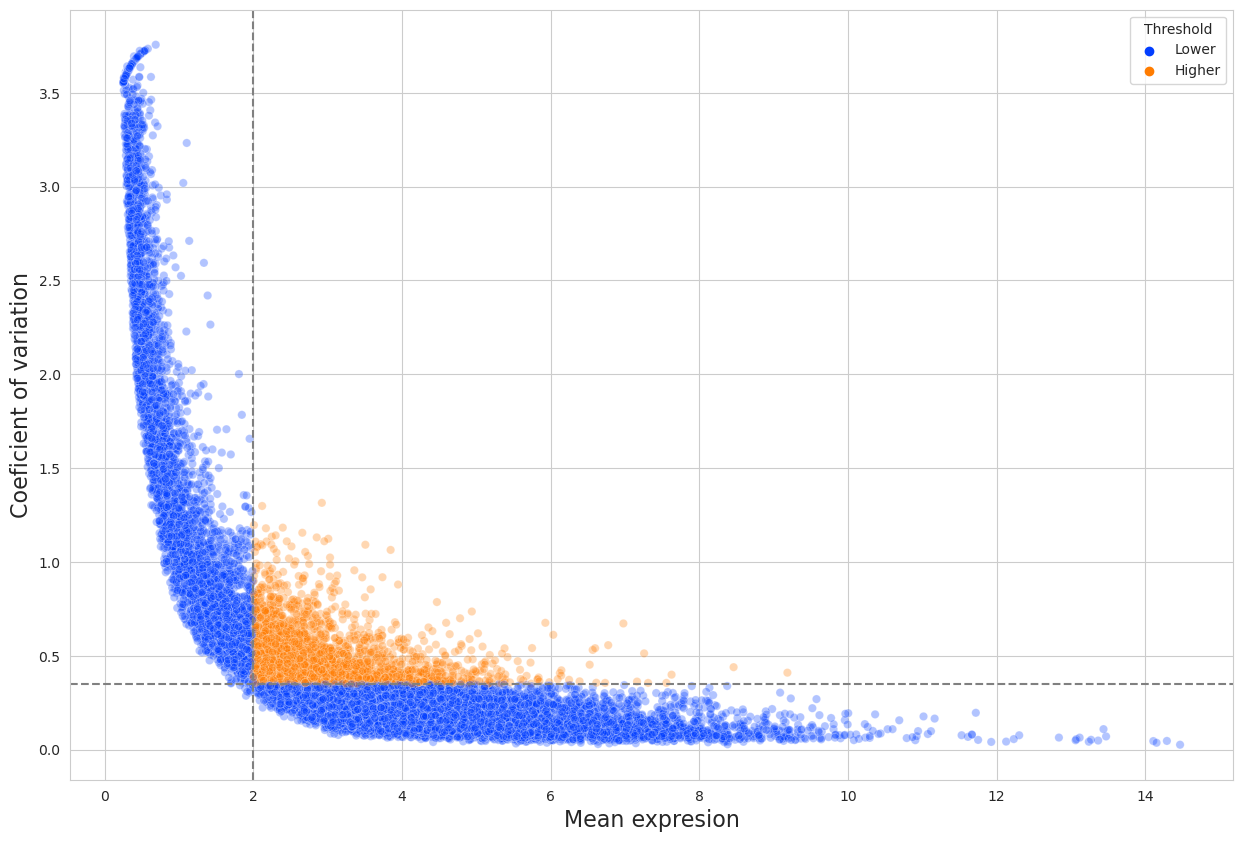

In [21]:

matplotlib.pyplot.figure(figsize = (15, 10))
seaborn.set_style('whitegrid')

mean_mean = 2
CV_mean = 0.35

value = (subset['Mean'] > mean_mean) & (subset['CV'] > CV_mean)
subset['Threshold']= numpy.where( value == True , 'Higher', 'Lower')


seaborn.scatterplot(x = subset['Mean'], y = subset['CV'], hue = subset['Threshold'], palette = 'bright', alpha = .3)

matplotlib.pyplot.axhline(y = CV_mean, color = 'grey', linestyle = '--')
matplotlib.pyplot.axvline(x = mean_mean, color = 'grey', linestyle = '--')

matplotlib.pyplot.ylabel('Coeficient of variation', fontsize = 16)
matplotlib.pyplot.xlabel('Mean expresion',fontsize = 16)
print('Deleted: ', len(subset[subset['Threshold']=='Lower']))
print('Slected: ', len(subset[subset['Threshold']=='Higher']))

In [22]:
#Safe the selected genes on a diferent dataframe and safe it

In [23]:
df_definitive = df_sel[subset['Threshold']=='Higher']
df_definitive

,77322072-2a7f-49e6-a9d1-c521c25acd70.rna_seq.augmented_star_gene_counts.tsv,6f6bf240-1ca4-47d0-9a77-17b0ce9b8ae7.rna_seq.augmented_star_gene_counts.tsv,59e8b7b7-5183-4655-aa5e-e4b5ba73eded.rna_seq.augmented_star_gene_counts.tsv,5418228b-cfd0-4580-87c6-3ebf6282ad73.rna_seq.augmented_star_gene_counts.tsv,c7fd0bf8-753e-45d6-b987-51ec7559f728.rna_seq.augmented_star_gene_counts.tsv,50c308c9-922a-4083-ae09-e5e4d8c437af.rna_seq.augmented_star_gene_counts.tsv,55071ef3-bf09-43a2-a54c-a9ec61a84615.rna_seq.augmented_star_gene_counts.tsv,7d9c7c34-76e0-4622-b5f7-60e12f6d4e07.rna_seq.augmented_star_gene_counts.tsv,32675d71-6f79-4b8f-ab7c-e2350b15875c.rna_seq.augmented_star_gene_counts.tsv,3d11905a-16eb-40b2-a36b-e37dca6359d3.rna_seq.augmented_star_gene_counts.tsv,d6e945f2-4a94-48ab-9ba0-d4f0ee2fb262.rna_seq.augmented_star_gene_counts.tsv,2306a9ab-37ae-4dfd-b992-4f62022c3d4c.rna_seq.augmented_star_gene_counts.tsv,d3ebb2ea-10db-4c29-8e7c-7c13b23b5b15.rna_seq.augmented_star_gene_counts.tsv,160dd8d4-3262-4789-bd92-d5470bc7d41b.rna_seq.augmented_star_gene_counts.tsv,e62d96e9-3e79-4eef-9e5e-568a48dd737b.rna_seq.augmented_star_gene_counts.tsv
gene_id,,,,,,,,,,,,,,,
ENSG00000001626.16,0.963787,3.141453,3.666706,2.087092,4.176195,0.643469,3.070943,0.272779,1.378276,4.118477,5.300924,1.368252,1.139926,1.423463,0.808775
ENSG00000002726.21,6.199806,6.636283,0.784216,4.268786,2.565414,1.246164,1.487441,6.635532,5.620950,0.049878,3.486965,0.942768,2.890983,7.571241,3.081499
ENSG00000003989.18,3.525677,3.304604,4.256599,0.825451,4.782394,1.334160,6.206568,4.849789,3.783950,4.526124,5.730759,3.360210,9.199377,6.118265,5.253091
ENSG00000004777.18,3.066006,2.071796,1.751171,2.749516,1.711609,3.975462,2.615524,2.152939,3.237053,0.622682,1.874249,4.774385,3.818449,2.904250,2.424257
ENSG00000004838.14,2.894162,0.927471,3.080319,1.879253,1.943277,3.412070,2.913176,0.496411,3.618404,0.061386,5.758976,1.414613,0.772061,2.779680,3.552621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000287750.1,1.795706,2.647328,2.560252,4.827439,0.947979,4.929236,0.199583,3.128031,0.528324,0.051108,0.961376,4.268446,4.189696,4.324722,2.015248
ENSG00000287770.1,1.548079,3.817663,4.170891,3.642480,2.039518,0.017368,4.621395,4.200885,0.785971,0.000000,0.023494,7.849603,7.051512,3.200911,0.390823
ENSG00000287906.1,3.467100,4.365040,4.881894,6.662963,4.368590,4.685049,2.922485,4.611279,3.315692,0.248210,5.119547,4.171406,1.628754,4.871957,3.539084


In [24]:
df_definitive.to_csv('/home/marti/jupy/jup_notebook/Project/result/genes_selected.csv', index=True, sep='\t')
subset.to_csv('/home/marti/jupy/jup_notebook/Project/result/genes_selected_subset.csv', index=True, sep='\t')

In [25]:
# Heat map generation

/home/marti/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/marti/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 2000x1500 with 0 Axes>

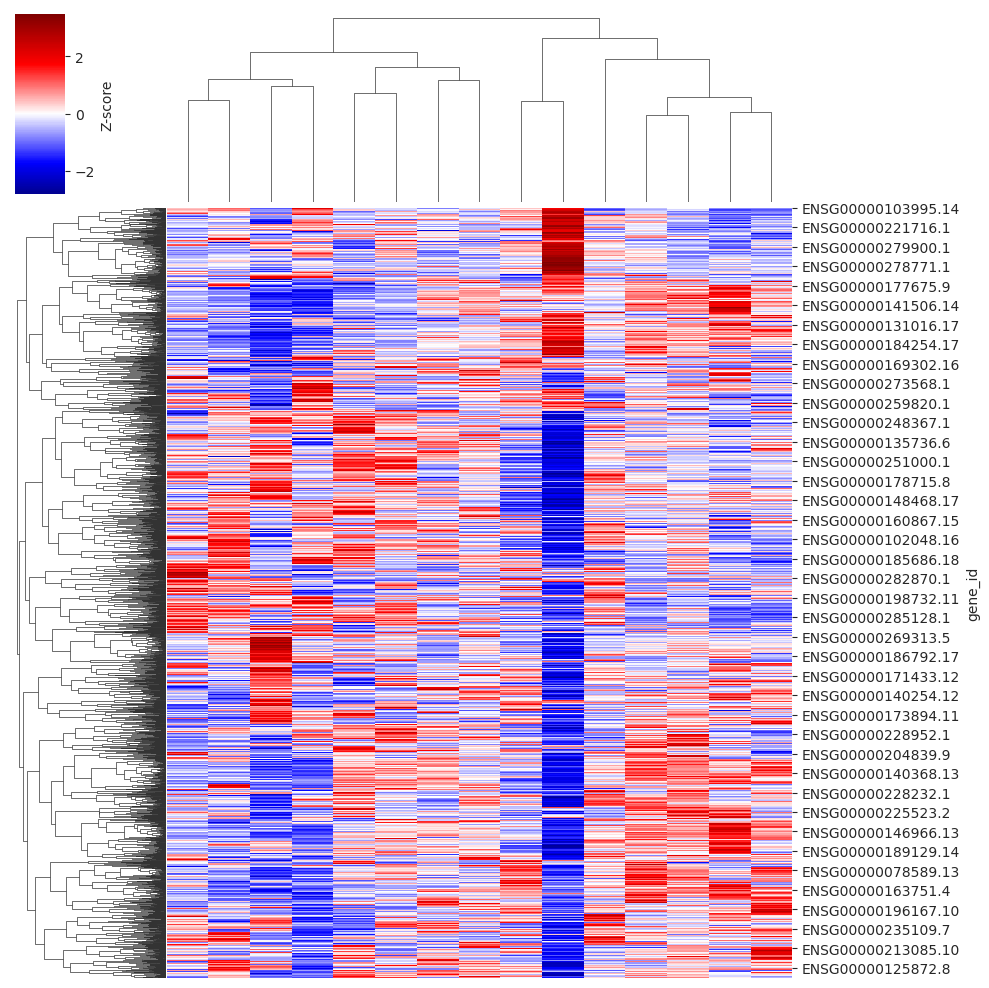

In [26]:
# To perform heat maps we need to calculate z-cores.
z_scores = zscore(df_definitive, axis=1, ddof=1)
matplotlib.pyplot.figure(figsize = (20, 15))
# We took the 250 patiens to perfomr de heat map, and the data was the z score with the log2 TPM+1 a
heatmap = seaborn.clustermap(z_scores, cmap = 'seismic', xticklabels = False, center = 0, #bar symmetric
                         method = 'complete', metric = 'cosine', cbar_kws = {'label':'Z-score'})
